In [1]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import skimage.util
import scipy.ndimage as ndimage
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np
import matplotlib


plt.gray()
lena= rgb2gray(imread('lena.tiff'))
cameraman = imread('cameraman.tif').astype(np.float64)/255


def gaussian_filter(n_rows, n_cols, stdv):
    """
    Returns a 2d Gaussian image filter.
    """
    g_r = signal.windows.gaussian(n_rows, stdv)
    g_c = signal.windows.gaussian(n_cols, stdv)

    G = np.outer(g_r, g_c)

    return G/np.sum(G)

def PSNR(f,g):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))


<Figure size 640x480 with 0 Axes>

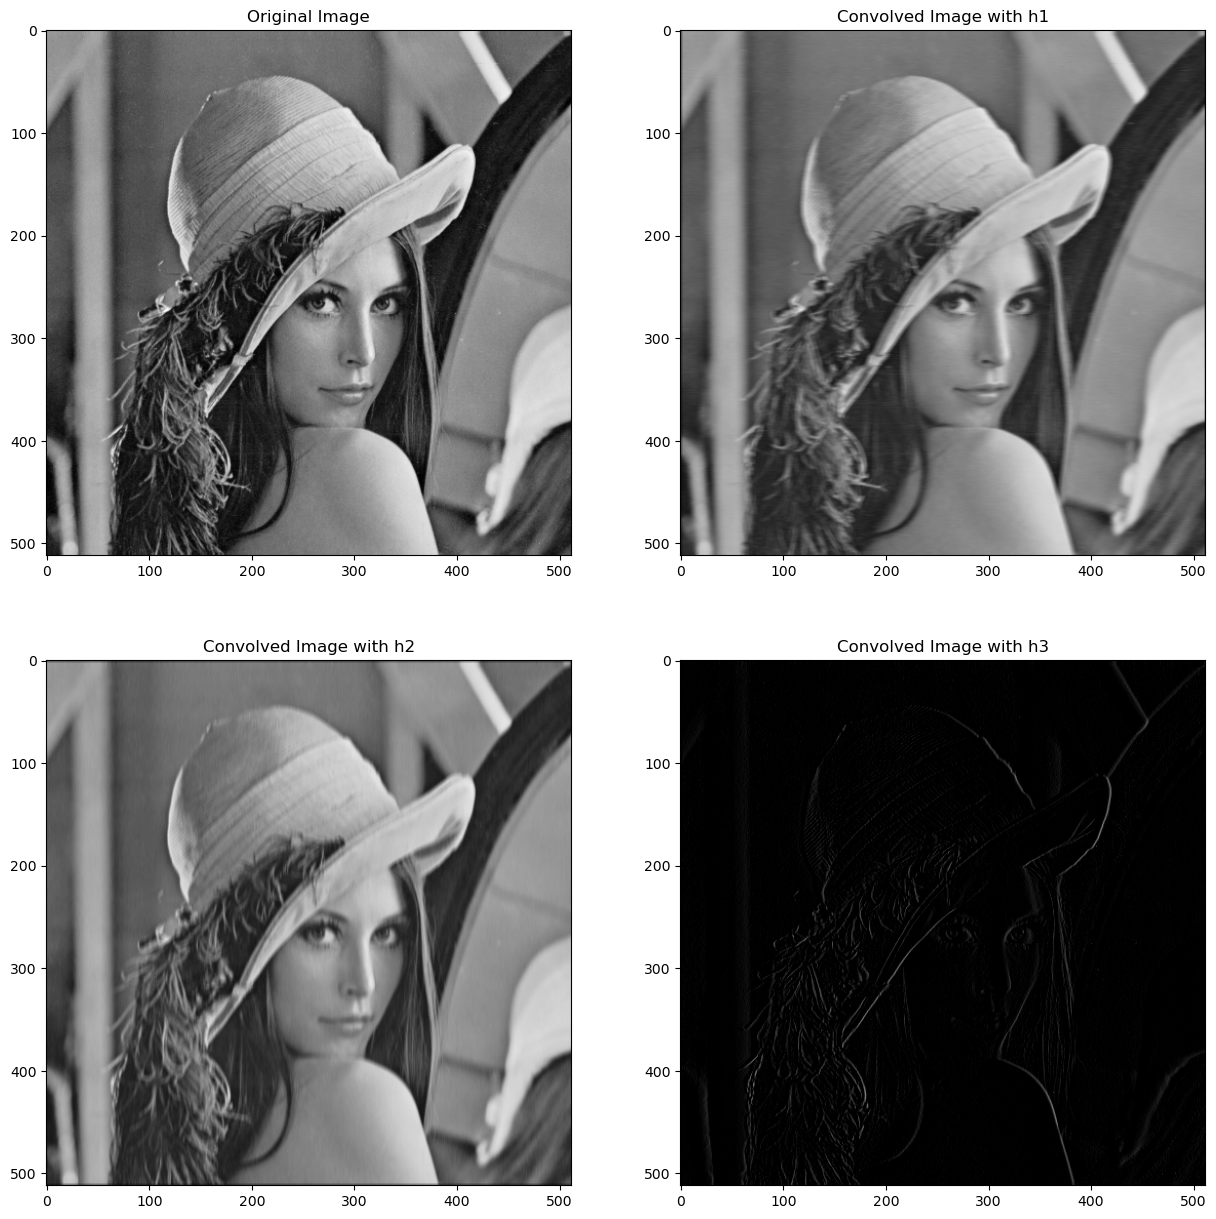

In [10]:
# Part 2 Discrete Convolution for Image Processing

h1 = (1/6)*np.ones((1,6))
h2 = h1.T
h3 = np.array([[-1,1]])

convolved_lena1 = signal.convolve2d(lena, h1, mode='same')
convolved_lena2 = signal.convolve2d(lena, h2, mode='same')
convolved_lena3 = signal.convolve2d(lena, h3, mode='same')

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(lena)
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(convolved_lena1, vmin=0, vmax=1)
plt.title('Convolved Image with h1')

plt.subplot(2,2,3)
plt.imshow(convolved_lena2, vmin=0, vmax=1)
plt.title('Convolved Image with h2')

plt.subplot(2,2,4)
plt.imshow(convolved_lena3, vmin=0, vmax=1)
plt.title('Convolved Image with h3')
plt.show()



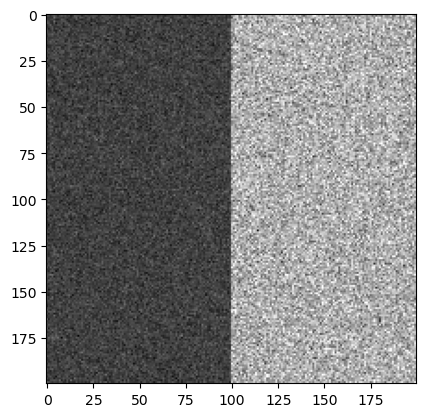

In [14]:
# Part 3 Noise Generation

def noise(image, mode, variance):
    f_noise = skimage.util.random_noise(image, mode=mode, mean=0,var=variance)
    return f_noise

f = np.hstack([0.3*np.ones((200,100)), 0.7*np.ones((200,100))])

f_gaussian = skimage.util.random_noise(f, mode='gaussian', mean=0,var=0.01)
f_sandp = skimage.util.random_noise(f, mode='s&p')
f_speckle = skimage.util.random_noise(f, mode='speckle', mean=0,var=0.04)

plt.imshow(f_gaussian)
plt.imshow(f_sandp)
plt.imshow(f_speckle)


# gaussian = plt.imshow(noise(f,'gaussian',0.01))
# sandp = plt.imshow(noise(f,'s&p'))